### Entropy of the 2D Ising Model
Calculate entropy from free energy (given by Onsagers expression)


In [1]:
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt

In [2]:
from scipy.integrate import dblquad

Most important term (which I cannot integrate analytically)
$\int^{2\pi}_0 d\theta_1 \int^{2\pi}_0 d\theta_2 \frac{\sinh(2 \beta J) - (\cos(\theta_1)-\cos(\theta_2))}{\cosh(2\beta J)^2-\sinh(2\beta J)(\cos(\theta_1)-\cos(\theta_2))}$

In [3]:
def integrandb0(theta1, theta2, beta=0.1, J=-1):
    t = np.cos(theta1)-np.cos(theta2)
    inner = np.cosh(2*beta*J)**2 - np.sinh(2*beta*J) * t
    
    return -1/(8*pi**2)*np.log(inner)

def integrandb1(theta1, theta2, beta=0.1, J=-1):
    t = np.cos(theta1)-np.cos(theta2)
    num = t - 2*np.sinh(2*beta*J)
    denom = np.cosh(2*beta*J) - np.tanh(2*beta*J)*t
    
    return -J*beta/(4*pi**2)* num/denom

In [4]:
entropy_low = []
entropy_high = []
T = np.linspace(0.01,4,100)
for beta in 1/T:
    print(beta)
    entropy_low.append(dblquad(lambda t1,t2: integrandb0(t1, t2, beta), 0, 2*pi, lambda x: 0, lambda x: 2*pi))
    entropy_high.append(dblquad(lambda t1,t2: integrandb1(t1, t2, beta), 0, 2*pi, lambda x: 0, lambda x: 2*pi))
    
entropy_low = np.array(entropy_low)
entropy_high = np.array(entropy_high)

100.0
19.879518072289155
11.036789297658864
7.638888888888888
5.840707964601769
4.727793696275071
3.9711191335740073
3.423236514522821
3.0082041932543295
2.6829268292682924
2.4211298606016136
2.205882352941176
2.0257826887661143
1.872871736662883
1.7414248021108176
1.6272189349112425
1.5270708005552984
1.4385353095030513
1.3597033374536465
1.2890624999999998
1.225399183067211
1.167728237791932
1.1152416356877324
1.0672703751617076
1.0232558139534884
0.9827278141751042
0.9452878831280436
0.9105960264900661
0.878360393931328
0.8483290488431876
0.820283370618941
0.7940327237728585
0.7694101189088365
0.7462686567164178
0.7244785949506037
0.7039249146757679
0.6845052893590541
0.6661283811061768
0.6487124041674857
0.6321839080459769
0.616476742013824
0.6015311702515493
0.587293112653497
0.5737134909596662
0.5607476635514018
0.5483549351944167
0.5364981303853031
0.5251432208784214
0.5142589995324918
0.5038167938931297
0.49379021397575945
0.4841549295774648
0.47488847316160604
0.46597006495340

In [10]:
entropy = np.vstack((T, np.log(2)-(entropy_low[:,0]+entropy_high[:,0])))
np.save('entropy.npy', entropy)

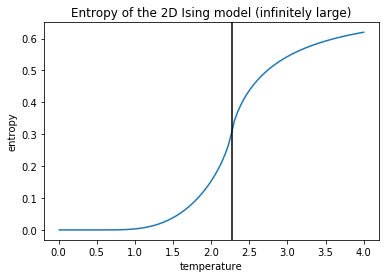

In [11]:
plt.plot(T, np.log(2)-(entropy_low[:,0]+entropy_high[:,0]))
plt.ylabel('entropy')
plt.xlabel('temperature')
plt.title('Entropy of the 2D Ising model (infinitely large)')
plt.axvline(2.269, c='k')